<a href="https://colab.research.google.com/github/FGalvao77/Identificando-cancer-de-prostata-com-tecnicas-de-ML/blob/main/Identificando_c%C3%A2ncer_de_pr%C3%B3stata_com_t%C3%A9cnicas_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identificando câncer de próstata com técnicas de ML**

---



### **1. Introdução**

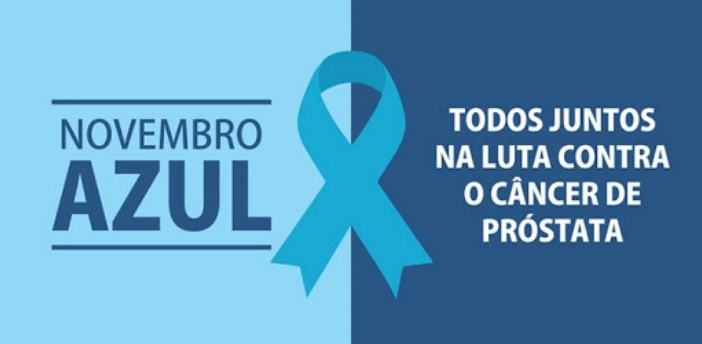

**Câncer de próstata**

No Brasil, o câncer de próstata é o segundo mais comum entre os homens (atrás apenas do câncer de pele não-melanoma). Em valores absolutos e considerando ambos os sexos, é o segundo tipo mais comum. A taxa de incidência é maior nos países desenvolvidos em comparação aos países em desenvolvimento.

A próstata é uma glândula que só o homem possui e que se localiza na parte baixa do abdômen. Ela é um órgão pequeno, tem a forma de maçã e se situa logo abaixo da bexiga e à frente do reto (parte final do intestino grosso). A próstata envolve a porção inicial da uretra, tubo pelo qual a urina armazenada na bexiga é eliminada. A próstata produz parte do sêmen, líquido espesso que contém os espermatozoides, liberado durante o ato sexual.

Mais do que qualquer outro tipo, é considerado um câncer da terceira idade, já que cerca de 75% dos casos no mundo ocorrem a partir dos 65 anos. O aumento observado nas taxas de incidência no Brasil pode ser parcialmente justificado pela evolução dos métodos diagnósticos (exames), pela melhoria na qualidade dos sistemas de informação do país e pelo aumento na expectativa de vida.

Alguns desses tumores podem crescer de forma rápida, espalhando-se para outros órgãos e podendo levar à morte. A maioria, porém, cresce de forma tão lenta (leva cerca de 15 anos para atingir 1 cm³ ) que não chega a dar sinais durante a vida e nem a ameaçar a saúde do homem.

- Fonte: https://www.inca.gov.br/tipos-de-cancer/cancer-de-prostata

O nosso desafio é criar um modelo pra predizer o `câncer de próstata` através de alguns atributos.

E para esse desafio utilizaremos o classificador [multinomial Naïve Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

A base de dados utilizada foi extraída do [Kaggle](https://www.kaggle.com/sajidsaifi/prostate-cancer).



**Naive Bayes**

O classificador _multinomial Naïve Bayes_ é um dos modelos mais populares no
aprendizado de máquina. Tomando como premissa a suposição de independência
entre as variáveis do problema, o modelo de `Naïve Bayes` realiza uma classificação probabilística de observações, caracterizando-as em classes pré-definidas.

Sendo um modelo adequado para classificação de atributos discretos, o Naïve Bayes tem aplicações na _análise de crédito, diagnósticos médicos ou busca por falhas em sistemas mecânicos_.

É interessante saber que o Naïve Bayes é um dos modelos mais conhecidos a aplicar o conceito de probabilidade. Esse modelo, como o nome indica, faz uso do **teorema de Bayes** como princípio fundamental. 

### **2. Importando as bibliotecas e carregando o conjunto de dados**

In [1]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# instanciando a "url", salvei uma cópia dos dados no meu repositório de datasetes do github
url = 'https://raw.githubusercontent.com/FGalvao77/datasets/main/Prostate_Cancer.csv'

In [3]:
# realizando o carregamento e leitura do conjunto de dados
data = pd.read_csv(url, sep=',')

### **3. Análise exploratória do conjunto de dados**

In [4]:
# visualizando as 5 primeiras linhas
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [5]:
# visualizando a dimensão do conjunto de dados
data.shape  # linhas e colunas

(100, 10)

In [6]:
# nome das colunas
data.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [7]:
# renomeando as colunas
data.rename(columns={
    'diagnosis_result': 'resultado_diagnostico',
    'radius': 'raio',
    'texture': 'textura',
    'perimeter': 'perimetro',
    'area': 'area',
    'smoothness': 'suavidade',
    'compactness': 'compacidade',
    'symmetry': 'simetria',
    'fractal_dimension': 'dimensao_fragmento'
}, inplace=True)

In [8]:
# visualizando o conjunto de dados
data

,id,resultado_diagnostico,raio,textura,perimetro,area,suavidade,compacidade,simetria,dimensao_fragmento
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [9]:
# estatística descritva do conjunto de dados
data.describe()

,id,raio,textura,perimetro,area,suavidade,compacidade,simetria,dimensao_fragmento
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [10]:
# realizando um mapeamento da variável "resultado_diagnostico" e atualizando o nome das instâncias presentes
data['resultado_diagnostico'] = data['resultado_diagnostico'].map({'M': 'maligno', 'B': 'benigno'})

In [11]:
# contabilizando a quantidade de instâncias da variável "resultado_diagnostico"
data['resultado_diagnostico'].value_counts()

maligno    62
benigno    38
Name: resultado_diagnostico, dtype: int64

In [12]:
# visualizando a distribuição dos dados na variável "resultado_diagnostico"
data['resultado_diagnostico'].describe()

count         100
unique          2
top       maligno
freq           62
Name: resultado_diagnostico, dtype: object

In [13]:
# visualizando as instâncias únicas das variáveis
data.nunique()

id                       100
resultado_diagnostico      2
raio                      16
textura                   17
perimetro                 55
area                      95
suavidade                 45
compacidade               85
simetria                  64
dimensao_fragmento        32
dtype: int64

In [14]:
# tipo de dado das colunas
data.dtypes

id                         int64
resultado_diagnostico     object
raio                       int64
textura                    int64
perimetro                  int64
area                       int64
suavidade                float64
compacidade              float64
simetria                 float64
dimensao_fragmento       float64
dtype: object

In [15]:
# removendo a variável "id"
data.drop(['id'], axis=1, inplace=True)

In [16]:
# visualizando as colunas
data.columns

Index(['resultado_diagnostico', 'raio', 'textura', 'perimetro', 'area',
       'suavidade', 'compacidade', 'simetria', 'dimensao_fragmento'],
      dtype='object')

In [17]:
# visualizando a correlação entre as variáveis
data.corr()

,raio,textura,perimetro,area,suavidade,compacidade,simetria,dimensao_fragmento
raio,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
textura,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimetro,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
suavidade,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compacidade,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
simetria,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
dimensao_fragmento,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


### **4. Visualização gráfica do conjunto de dados**

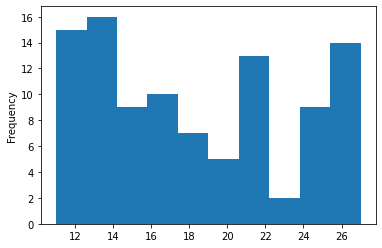

In [18]:
# plotando gráfico de histograma da variável "textura"
data['textura'].plot(kind='hist');

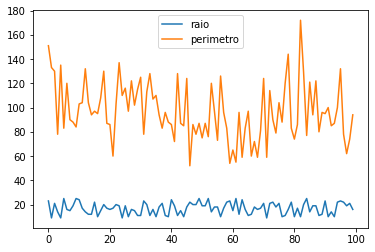

In [19]:
# plotando gráfico de linha das variáveis "raio" e "perimetro"
data[['raio', 'perimetro']].plot(kind='line');

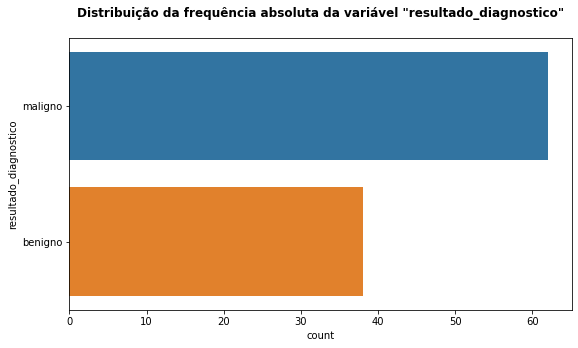

In [20]:
# usando a função ".countplot()" da biblioteca seaborn
# visualizando a distribuição absoluta dos dados da variável "resultado_diagnostico"
plt.figure(figsize=(9, 5))
plt.title('Distribuição da frequência absoluta da variável "resultado_diagnostico"\n', 
         fontsize = 12, fontweight = 'bold')
sns.countplot(data=data, y='resultado_diagnostico');

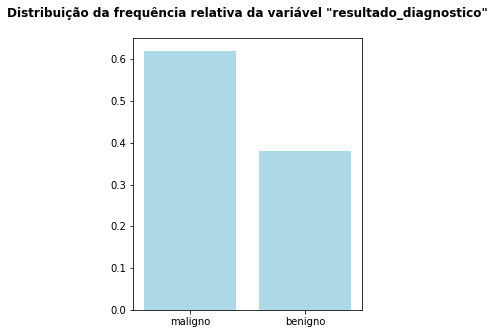

In [21]:
# visualizando a distribuição da frequência relativa dos dados na variável "resultado_diagnostico"
plt.figure(figsize=[9, 5])
plt.subplot(1,2,2)
plt.bar(data['resultado_diagnostico'].unique(), 
        data['resultado_diagnostico'].value_counts(normalize=True), color = 'lightblue')
plt.title('Distribuição da frequência relativa da variável "resultado_diagnostico"\n', 
          {'fontsize': 12,'fontweight': 'bold'})
plt.show();

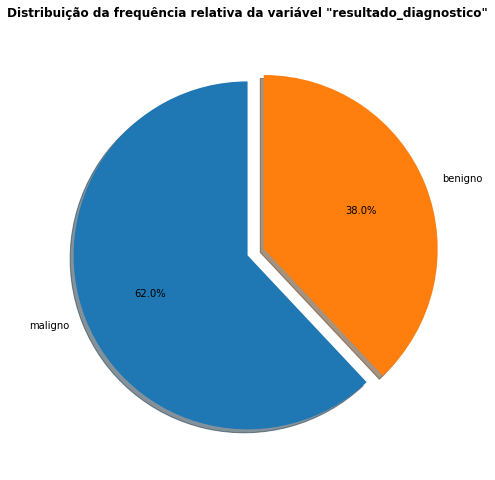

In [22]:
# plotando gráfico de torta da variál "resultado_diagnostico"
vals = data['resultado_diagnostico'].value_counts()
labels = [vals.index.tolist()]

plt.figure(figsize=[14, 8])

plt.title('Distribuição da frequência relativa da variável "resultado_diagnostico"\n', 
          {'fontsize': 12,'fontweight': 'bold'})

plt.pie(vals,
        labels=labels[0], 
        shadow=True,
        explode=(0.0, 0.1), 
        startangle=90, 
        autopct='%1.1f%%');

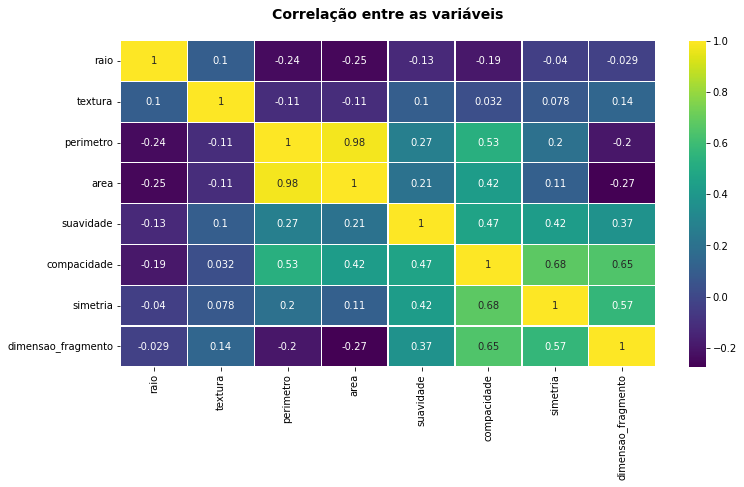

In [23]:
# plotando gráfico da correlação das variáveis
plt.figure(figsize=[12, 6])
plt.title('Correlação entre as variáveis\n', 
          {'fontsize': 14,'fontweight': 'bold'})
sns.heatmap(data.corr(), 
            linewidths=.1, 
            cmap='viridis',
            annot=True);

### **5. Aplicação da técnica de ML**

In [24]:
# importando a biblioteca para classificação
from sklearn.preprocessing import LabelEncoder

In [25]:
# instanciando o modelo de classificação
lb = LabelEncoder()

In [26]:
# aplicando o modelo e realizando a transformação dos dados da variável alvo
data['resultado_diagnostico'] = lb.fit_transform(data['resultado_diagnostico'])

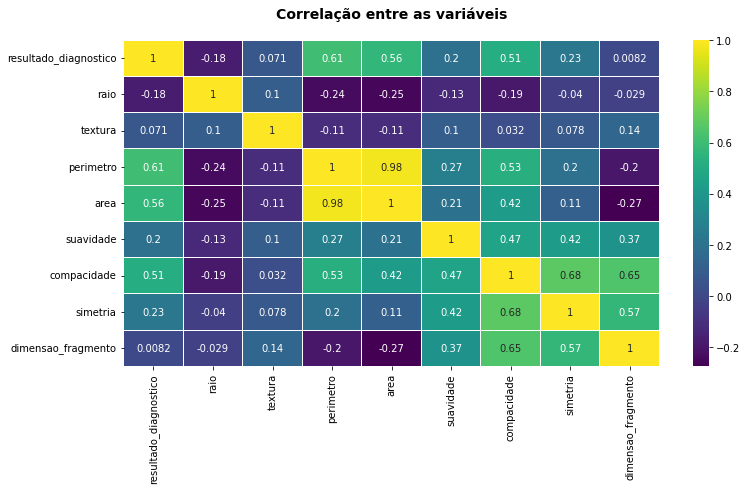

In [27]:
# plotando gráfico da correlação das variáveis depois do tratamento da variável alvo
plt.figure(figsize=[12, 6])
plt.title('Correlação entre as variáveis\n', 
          {'fontsize': 14,'fontweight': 'bold'})
sns.heatmap(data.corr(), 
            linewidths=.1, 
            cmap='viridis',
            annot=True);

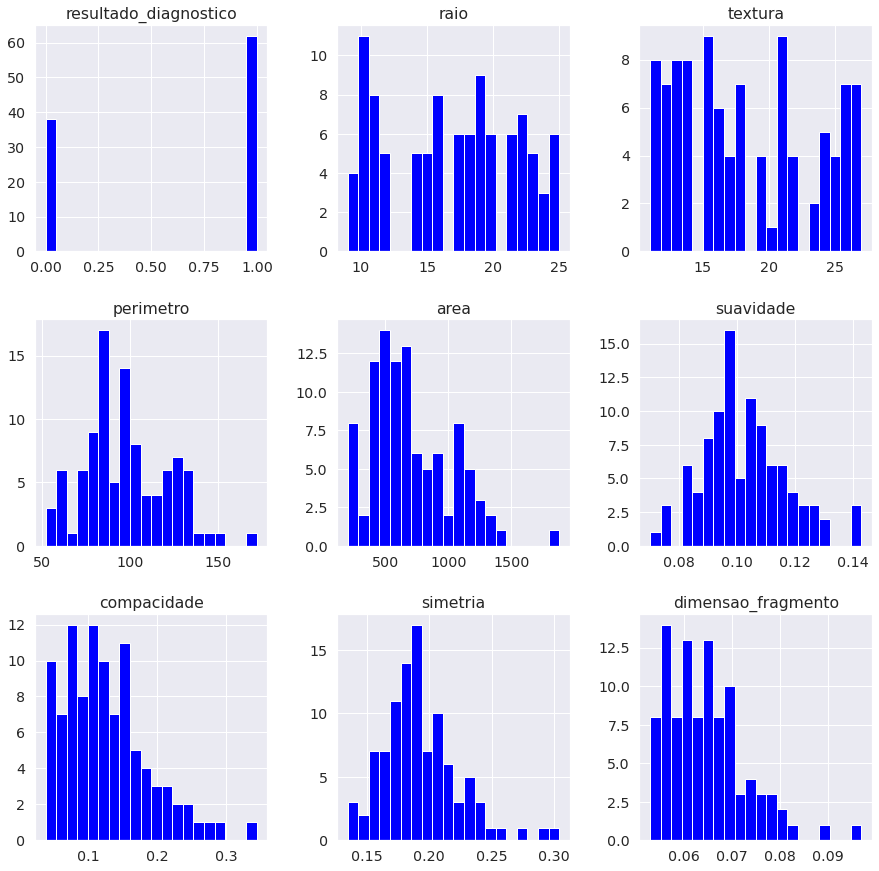

In [28]:
# plotando gráfico de histograma das variáveis
sns.set(font_scale=1.3, rc={'figure.figsize': (15, 15)})
ax = data.hist(bins= 20, color='blue')

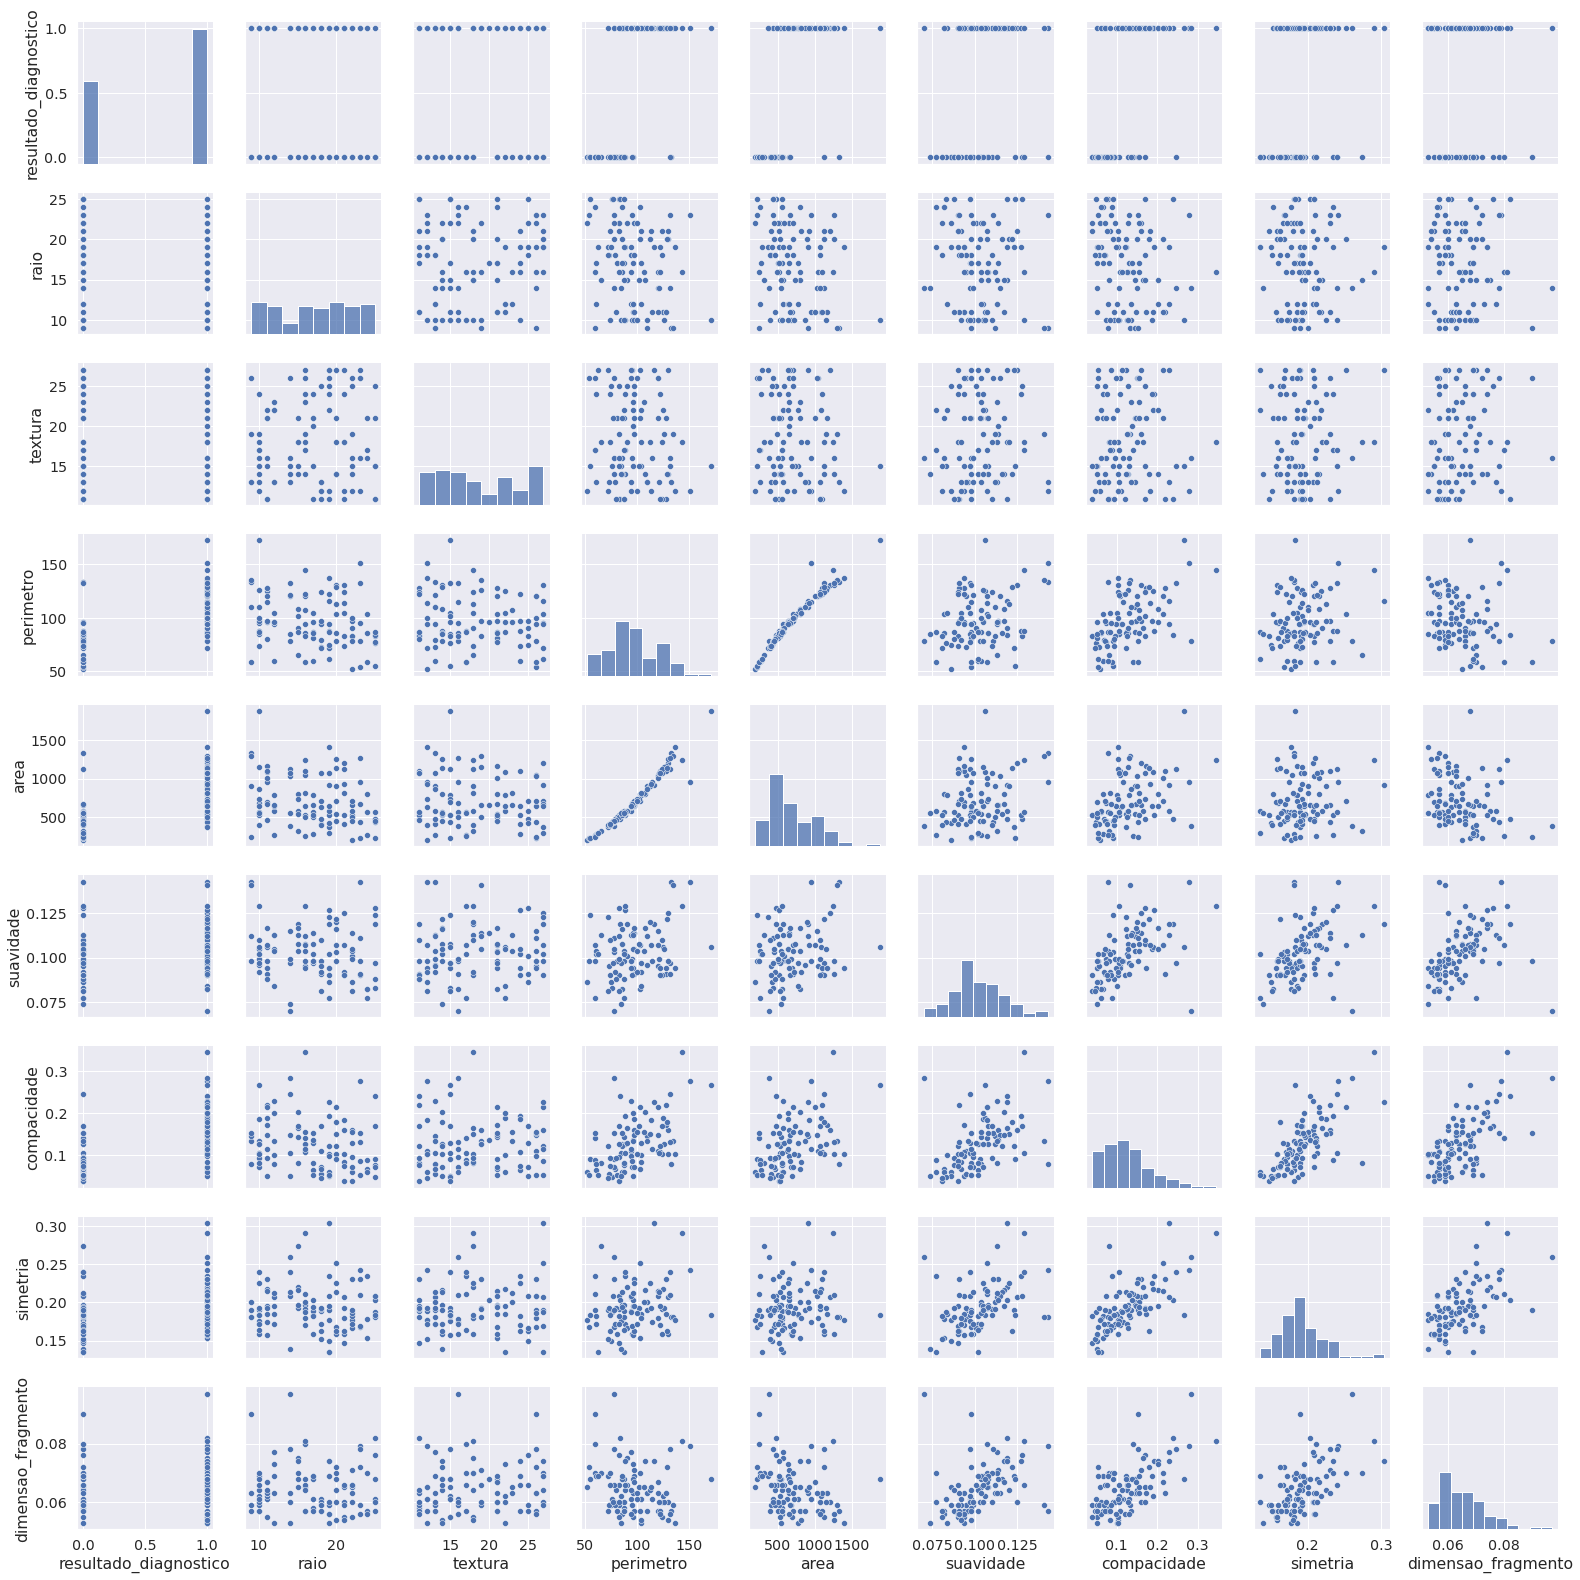

In [29]:
# plotando diversos gráficos com a função ".pairplot()" da biblioteca do seaborn
sns.pairplot(data);

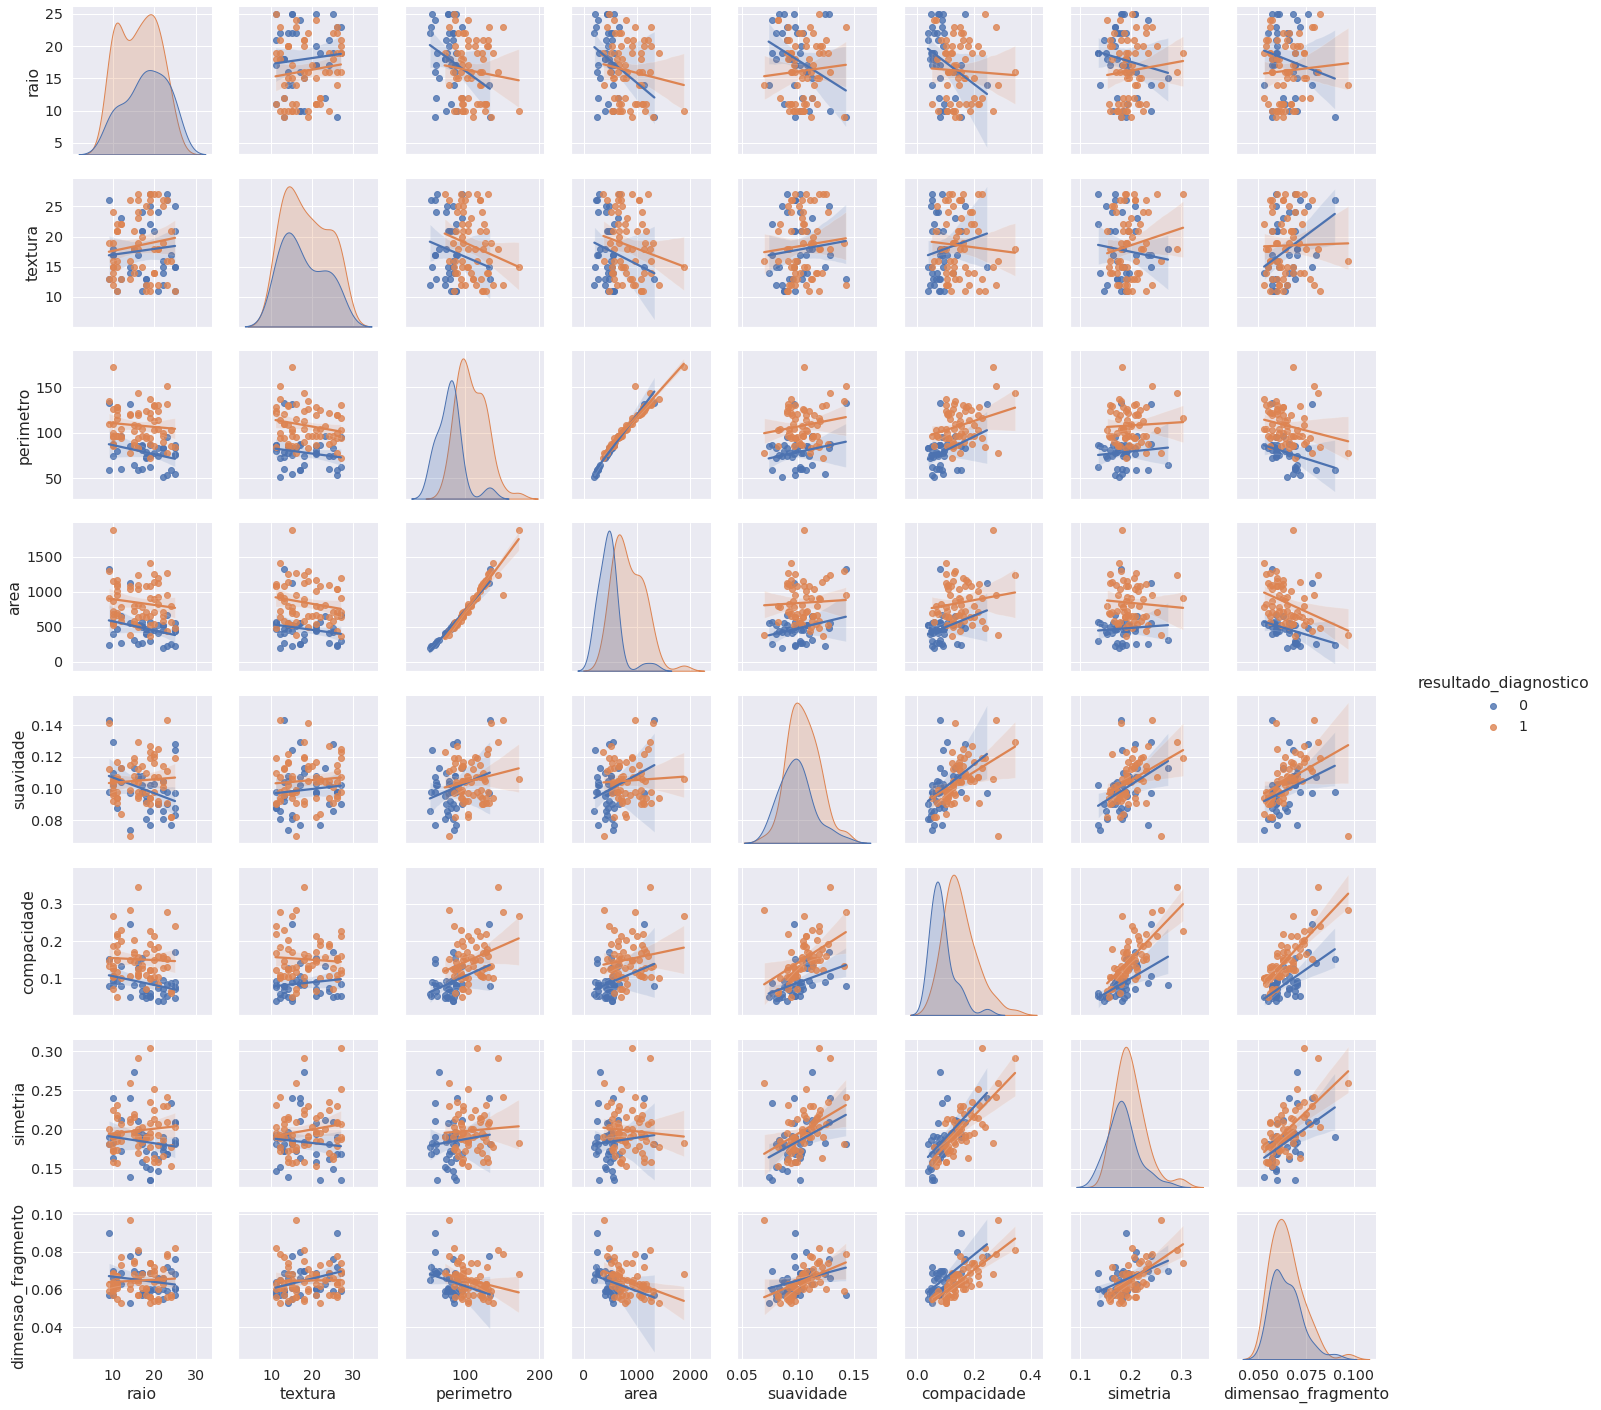

In [30]:
# com a função ".pairplot()" plotando gráfico do tipo regressão das variáveis em relação a variável alvo
# e visualizando as distribuições das instâncias das variáveis
sns.pairplot(data, hue='resultado_diagnostico', kind='reg');

In [31]:
# instanciando as variáveis explicativas (x) e a resposta (y)
X = data.iloc[:, 1:].values     # variáveis explicativas
y = data.iloc[:, 0:1].values    # variável resposta

In [32]:
# importando a função para realizar a partição dos dados em treino e teste
from sklearn.model_selection import train_test_split

In [33]:
# dividindo os dados das variáveis X e y em partes para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, # 30% dos dados para teste
                                                    random_state=123)

In [34]:
# visualizando o tamanho dos dados de treino
len(X_train), len(X_test), len(y_train), len(y_test)

(70, 30, 70, 30)

In [35]:
# importando o classificador
from sklearn.naive_bayes import GaussianNB

In [36]:
# instanciando o classificador
gauss = GaussianNB()

In [37]:
# realizando o treinamento do classificador com os dados de treino
gauss.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
# visualizando o score do modelo
gauss.score(X_train, y_train)

0.8142857142857143

> Veja que o classificador teve uma perfomance de ~81% nos dados de treino.

In [40]:
# realizando as predições com os dados de teste
preds = gauss.predict(X_test)

In [41]:
# importando o relatório de classificação e a matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
# instanciando o relatório de classificação e a matriz de confusão
report = classification_report(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.83      0.86      0.84        22

    accuracy                           0.77        30
   macro avg       0.70      0.68      0.69        30
weighted avg       0.76      0.77      0.76        30




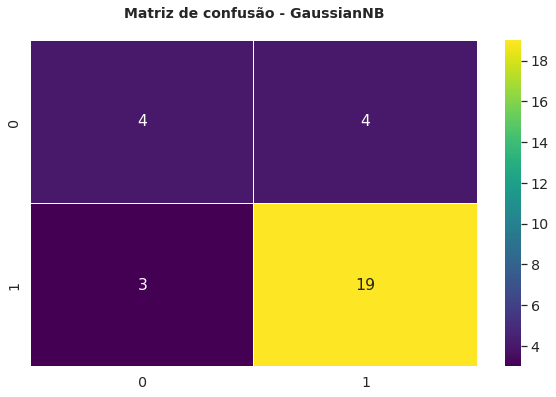

In [43]:
# visualizando o relatório de classificação e plotando a matriz de confusão
print(f'{report}\n')
plt.figure(figsize=[10, 6])

plt.title('Matriz de confusão - GaussianNB\n', 
          {'fontsize': 14,'fontweight': 'bold'})

sns.heatmap(conf_mat, linewidths=.1, cmap='viridis', annot=True);

> Podemos visualizar que o modelo classificou `4 instâncias como falsos positivos` e  `3 como falsos negativos`.

Dentro do contexto de saúde, os **falsos negativos** é um problema a ser levado em consideração, pois o modelo previu que 3 observações não tendo _câncer de próstata_ e, na verdade é o contrário. E isso pode ser crucial para o início do tratamento do paciente.

Mas por outro lado, os **falsos positivos** também é uma problemática e devemos ter uma devida atenção, pois nesse caso estaremos tratando um paciente que não possui câncer como uma carga de medicação e etc. sem necessidades.

E diante da avaliação do modelo ainda há melhorias à realizar.

- _Uma solução para este modelo, seria a utilização de um conjunto de dados com mais observações, lembrando que no conjunto de dados utilizado temos somente `100 observações` e/ou a realização de `engenharia de recursos` e entre outras técnicas, assim quem sabe conseguiríamos melhorar a capacidade de generalização do modelo._

- _outra solução é aplicação de outra técnica/algoritmo._


Aproveitando a oportunidade vamos aplicar o algoritmo de **Floresta aleatória** o `RandomForestClassifier` e avaliar a performance dele.

In [44]:
# importando do sklearn do módulo "ensemble" a função "RandomForestClassifier"
from sklearn.ensemble import RandomForestClassifier

In [45]:
# instanciando o modelo na variável "rf" e passando com argumento "class_weight='balanced'"
# que irar relaizar um balanceamento das instâncias
rf = RandomForestClassifier(class_weight='balanced')

In [47]:
# treinando o modelo com as bases de treino
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# visualizando o score do modelo
rf.score(X_train, y_train)

1.0

> Veja que este modelo, nos dados de treino teve uma performance de 100%.

In [49]:
# realizando as predições com os dados de teste
preds = rf.predict(X_test)

In [50]:
# instanciando o relatório de classificação e a matriz de confusão
report = classification_report(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.91      0.91      0.91        22

    accuracy                           0.87        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.87      0.87      0.87        30




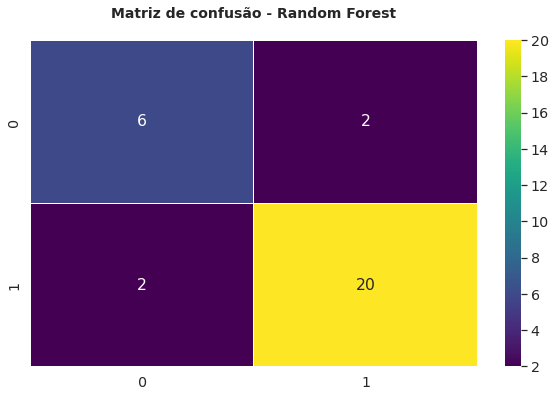

In [51]:
# visualizando o relatório de classificação e plotando a matriz de confusão
print(f'{report}\n')
plt.figure(figsize=[10, 6])

plt.title('Matriz de confusão - Random Forest\n', 
          {'fontsize': 14,'fontweight': 'bold'})

sns.heatmap(conf_mat, linewidths=.1, cmap='viridis', annot=True);

> Houve uma `melhora` com este modelo, mas ainda não é o "ideal"!
